# PROJECT ON REAL ESTATE PRICE PREDICTION

### by Lenin Meher

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df['longitude'].unique()

array([-122.23, -122.22, -122.24, -122.25, -122.26, -122.27, -122.28,
       -122.29, -122.3 , -122.21, -122.2 , -122.19, -122.18, -122.13,
       -122.16, -122.17, -122.15, -122.14, -122.12, -122.33, -122.34,
       -122.06, -122.07, -122.08, -122.09, -122.1 , -122.11, -122.03,
       -121.97, -122.02, -122.04, -122.05, -121.99, -122.01, -121.96,
       -121.98, -122.  , -121.93, -121.94, -121.95, -121.92, -121.89,
       -121.91, -121.9 , -121.88, -121.87, -121.85, -121.86, -121.84,
       -121.82, -121.77, -121.62, -121.61, -121.72, -121.73, -121.75,
       -121.8 , -121.76, -121.78, -121.79, -119.78, -119.93, -120.  ,
       -120.56, -120.59, -120.55, -120.25, -120.79, -120.8 , -120.65,
       -120.76, -120.88, -120.69, -120.93, -120.97, -120.87, -120.98,
       -120.72, -120.77, -120.66, -120.62, -120.71, -121.83, -121.81,
       -121.74, -121.68, -121.54, -121.51, -121.59, -121.58, -121.6 ,
       -121.63, -121.57, -121.65, -121.64, -121.71, -121.66, -121.56,
       -121.5 , -121

In [5]:
df.shape

(20640, 10)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df.loc[(df['median_house_value']>400000)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
89,-122.27,37.80,52,249,78.0,396,85,1.2434,NEAR BAY,500001
128,-122.21,37.83,40,4991,674.0,1616,654,7.5544,NEAR BAY,411500
140,-122.18,37.81,30,292,38.0,126,52,6.3624,NEAR BAY,483300
155,-122.23,37.81,52,2315,292.0,861,258,8.8793,NEAR BAY,410300
...,...,...,...,...,...,...,...,...,...,...
20428,-118.83,34.23,6,8803,1114.0,3385,1010,8.7288,<1H OCEAN,425800
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001
20438,-118.79,34.26,17,1986,249.0,761,241,7.2137,<1H OCEAN,401900
20442,-118.78,34.25,13,1841,237.0,833,231,7.7785,<1H OCEAN,404700


# Handling Missing Data

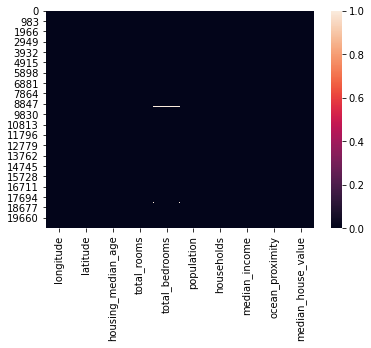

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
df['total_bedrooms'].fillna(np.mean(df['total_bedrooms']),inplace=True)

In [13]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Removing Outliers

In [14]:
outliers=[]
def detect_outliers(col):
    threshold=3
    mean=np.mean(col)
    std=np.std(col)
    for i in col:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(i)
    return outliers

In [15]:
outlier_value=detect_outliers(df['median_house_value'])

In [16]:
outlier_value

[]

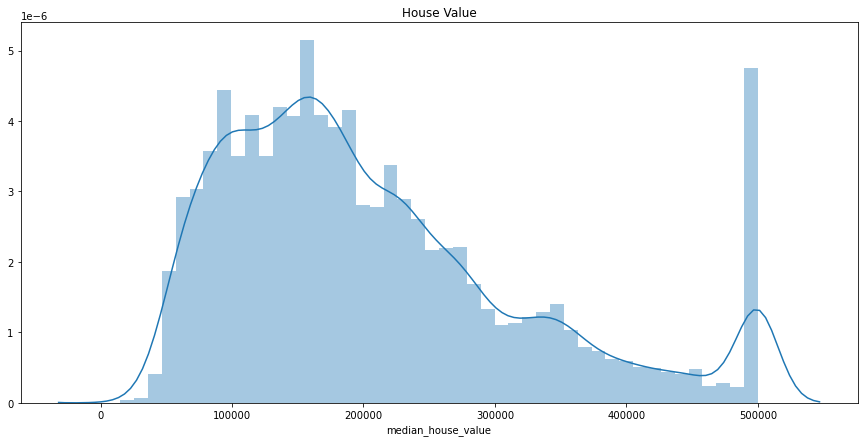

In [17]:
#NO outliers are present.
plt.figure(figsize=(15,7))
plt.title('House Value')
sns.distplot(df['median_house_value'],kde=True)

In [18]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le_OP=LabelEncoder()
df['ocean_proximity']=le_OP.fit_transform(df['ocean_proximity'])

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


# EDA

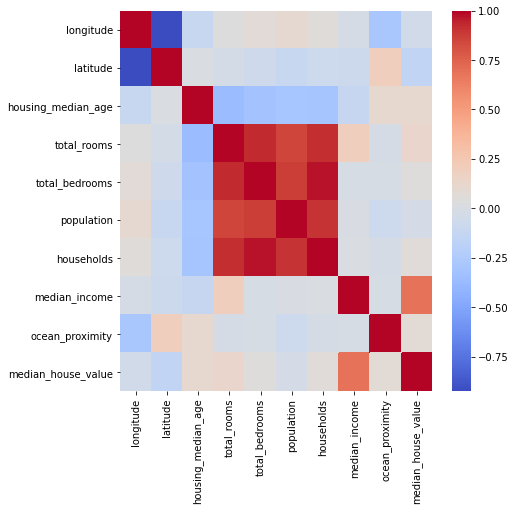

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cmap='coolwarm')

In [21]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.289779,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,0.200974,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.112468,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.015693,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,-0.014688,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.070282,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.018186,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,-0.014957,0.688075
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,1.000000,0.081750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,0.081750,1.000000


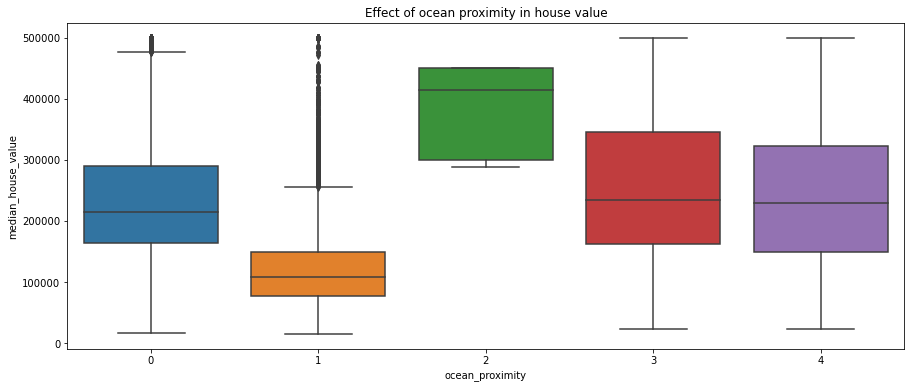

In [22]:
plt.figure(figsize=(15,6))
plt.title('Effect of ocean proximity in house value')
sns.boxplot('ocean_proximity','median_house_value',data=df)

In [24]:
sample=df.sample(n=100)

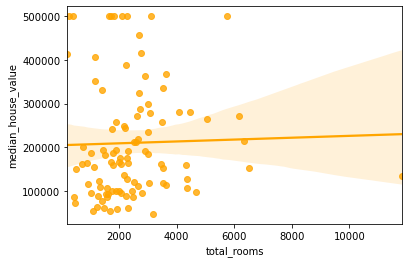

In [27]:
sns.regplot('total_rooms','median_house_value',data=sample,color='orange')

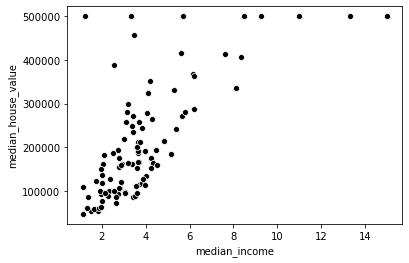

In [29]:
sns.scatterplot('median_income','median_house_value',data=sample,color='black')

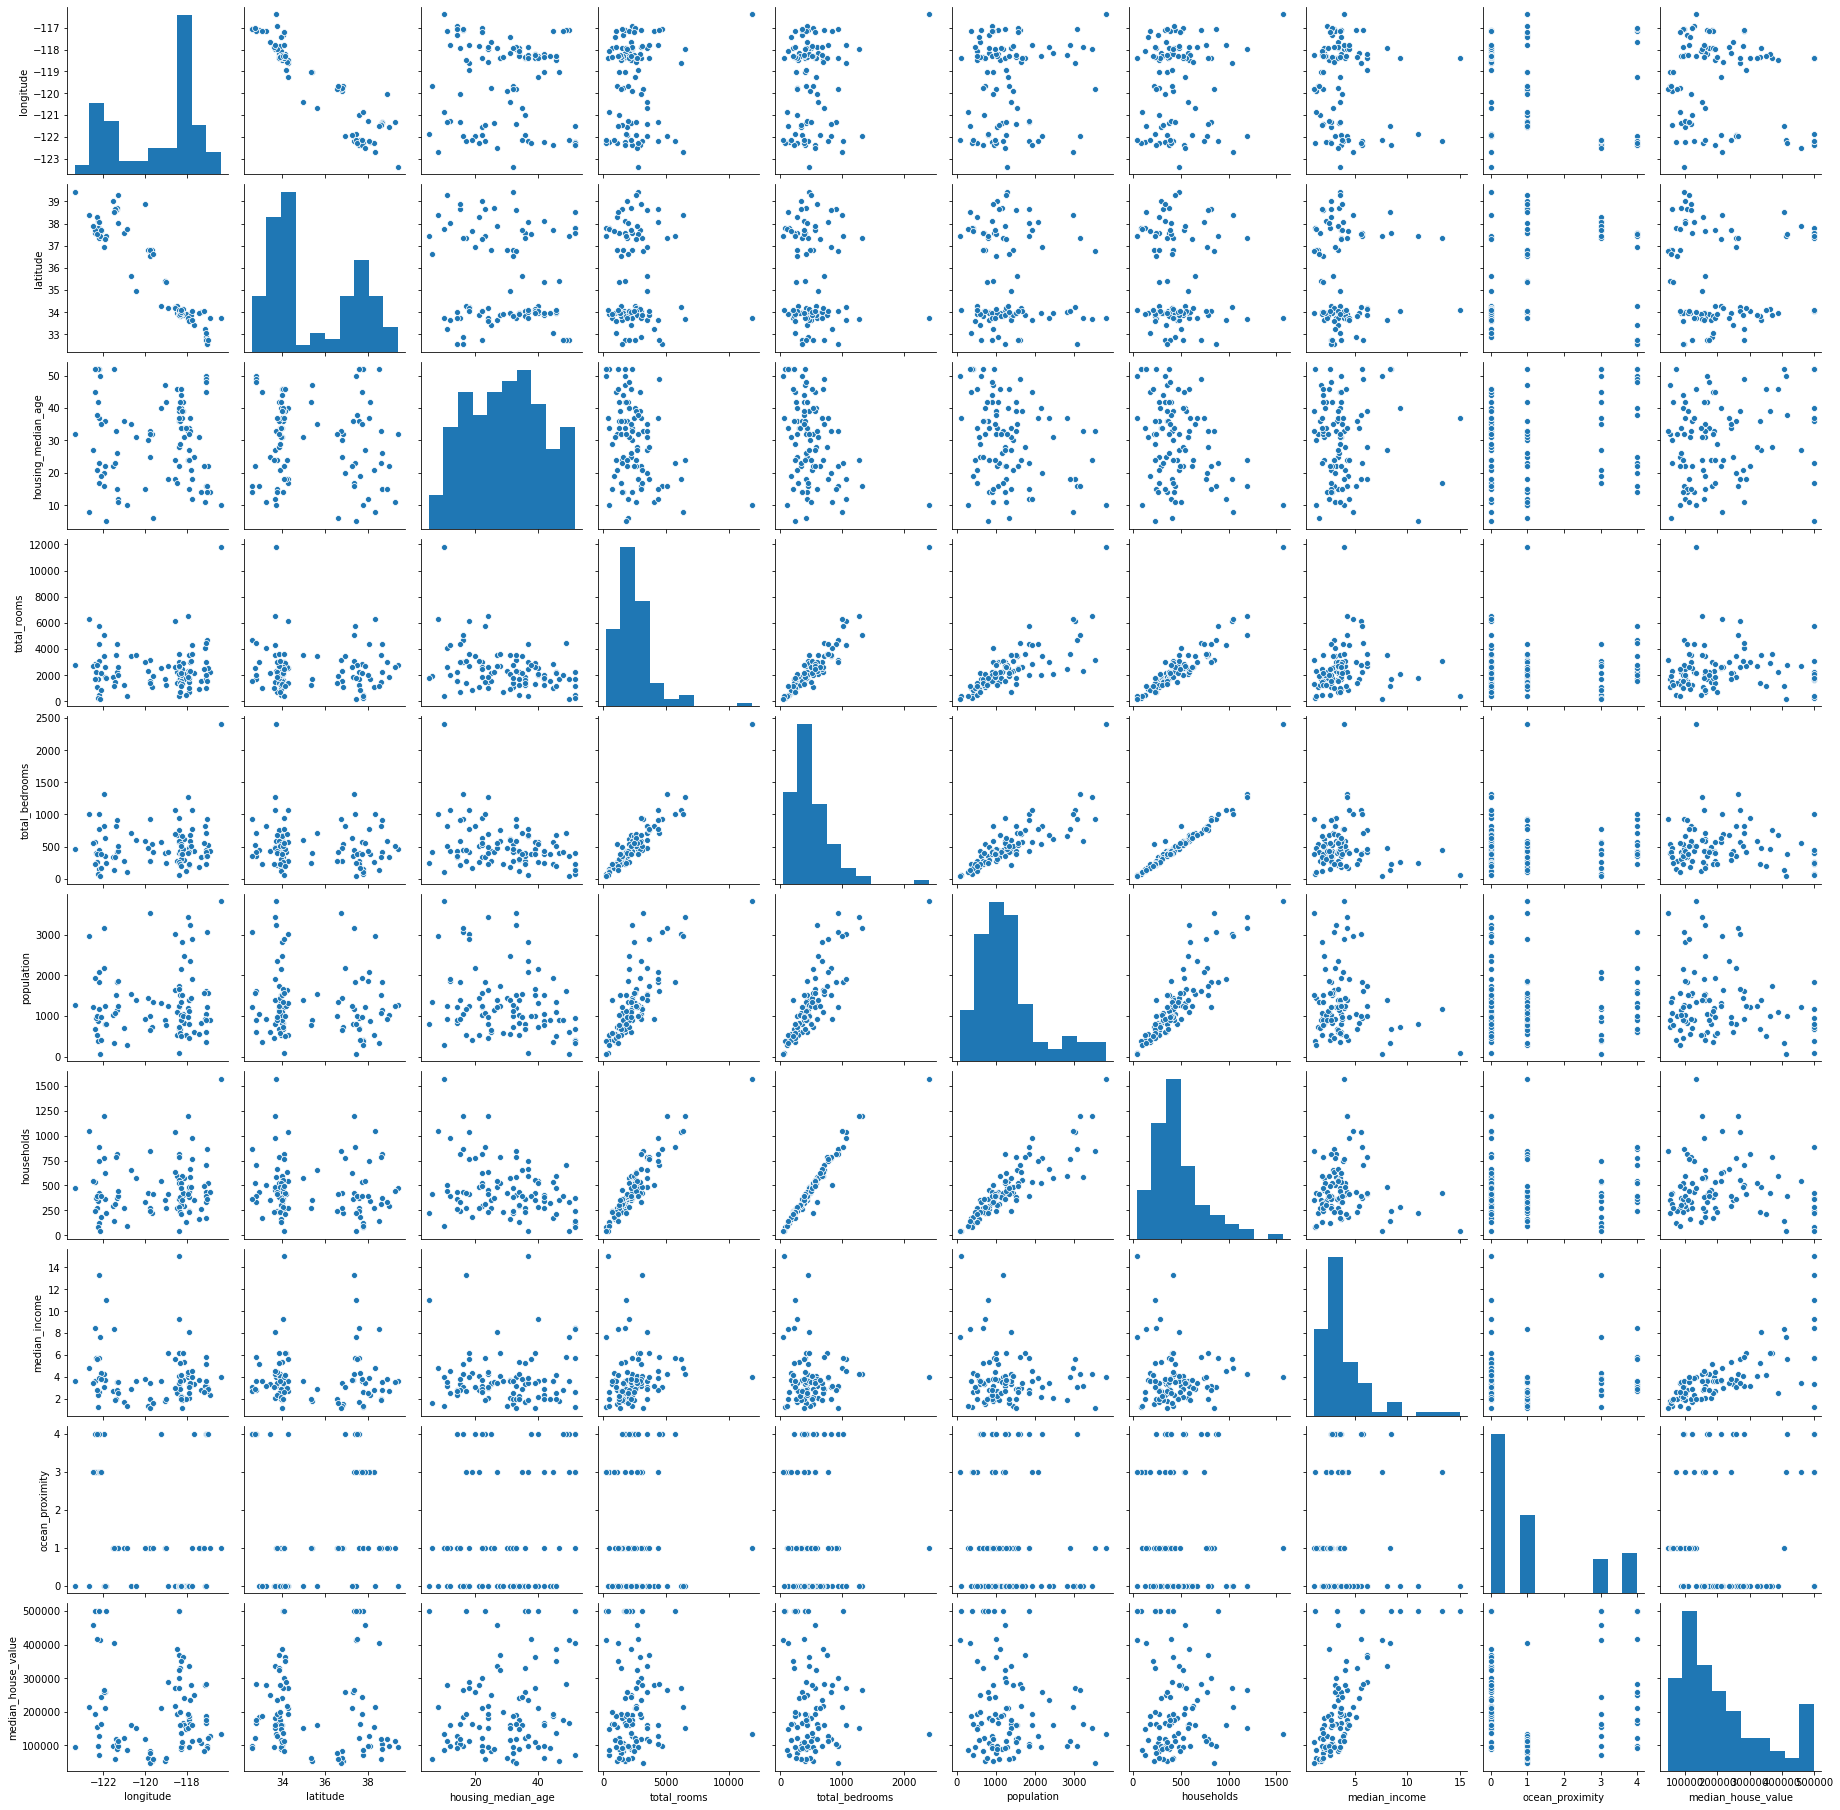

In [33]:
sns.pairplot(sample)

# Encoding Categorical Values

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [22]:
df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [23]:
df['1']=(df['ocean_proximity']==1).astype('int')
df['2']=(df['ocean_proximity']==2).astype('int')
df['3']=(df['ocean_proximity']==3).astype('int')
df['4']=(df['ocean_proximity']==4).astype('int')
df['0']=(df['ocean_proximity']==0).astype('int')

df.drop('ocean_proximity',axis=1,inplace=True)

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,0
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0,0


# Model Implementation

In [187]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '1', '2', '3', '4', '0'],
      dtype='object')

In [27]:
#Scaling attributes

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=pd.DataFrame(sc.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', '1', '2', '3', '4', '0']]),columns=[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', '1', '2', '3', '4', '0']])

In [28]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1,2,3,4,0
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,1.0,0.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,1.0,0.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,1.0,0.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,1.0,0.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,1.0,0.0,0.0


In [42]:
x=x
y=df.iloc[:,[8]]

In [43]:
y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (longitude,)           20640 non-null  float64
 1   (latitude,)            20640 non-null  float64
 2   (housing_median_age,)  20640 non-null  float64
 3   (total_rooms,)         20640 non-null  float64
 4   (total_bedrooms,)      20640 non-null  float64
 5   (population,)          20640 non-null  float64
 6   (households,)          20640 non-null  float64
 7   (median_income,)       20640 non-null  float64
 8   (1,)                   20640 non-null  float64
 9   (2,)                   20640 non-null  float64
 10  (3,)                   20640 non-null  float64
 11  (4,)                   20640 non-null  float64
 12  (0,)                   20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [45]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [46]:
y_test

,median_house_value
18643,215600
11413,231900
16256,50500
8152,246000
4987,120000
...,...
13248,176600
16554,120000
17314,230800
17601,312000


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

<ipython-input-47-3f0eb61105a0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

# Accuracy

In [48]:
pred=rf.predict(x_test)

In [49]:
from sklearn.metrics import r2_score

print('The accuracy is',r2_score(pred,y_test))

The accuracy is 0.7724664069900402


# Thank You! 